# Grupo 3
### Bruno Dueñas, Fernando Mejía, Mateo Córdova

## Imports y labels globales

In [1]:
import numpy as np
import graphviz
from graphviz import Digraph
import pandas as pd
labels = ['Proteccion', 'Pelo', 'Altura', 'Peso', 'Quemadura']
clase = ['Quema', 'No quema']

## Data

In [2]:
quemadura_data = pd.read_csv("arbQuemadura.csv", index_col=0)
quemadura_data.head()

,Pelo,Altura,Peso,Proteccion,Quemadura
Ejemplo,,,,,
1,rubio,medio,bajo,no,si
2,rubio,alto,medio,si,no
3,moreno,bajo,medio,si,no
4,rubio,bajo,medio,no,si
5,rojo,medio,alto,no,si


## Data tratada

In [3]:
d = {'rubio': 2, 'moreno': 1, 'rojo': 0}
quemadura_data['Pelo'] = quemadura_data['Pelo'].map(d)
d = {'alto': 2, 'medio': 1, 'bajo': 0}
quemadura_data['Peso'] = quemadura_data['Peso'].map(d)
d = {'alto': 2, 'medio': 1, 'bajo': 0}
quemadura_data['Altura'] = quemadura_data['Altura'].map(d)
d = {'si': 1, 'no': 0}
quemadura_data['Proteccion'] = quemadura_data['Proteccion'].map(d)
quemadura_data['Quemadura'] = quemadura_data['Quemadura'].map(d)
quemadura_data

,Pelo,Altura,Peso,Proteccion,Quemadura
Ejemplo,,,,,
1,2,1,0,0,1
2,2,2,1,1,0
3,1,0,1,1,0
4,2,0,1,0,1
5,0,1,2,0,1
6,1,2,2,0,0
7,1,1,2,0,0
8,2,0,0,1,0


In [4]:
quemadura_data2 = quemadura_data.copy()

### calcular la entropia

In [5]:
def calcular_entropia(p):
    return -np.sum(p*np.log2(p))

### calcular la ganancia

In [6]:
#calcular la ganancia
def calcular_ganancia(valores, var='Pelo'):
    valores, cuantos = np.unique(quemadura_data[var],return_counts=True)
    #genero una lista para calcular la ganancia
    info_A = []
    respuestas = [0, 0]
    indexes1 = []
    indexes0 = []
    for e in valores:
        se = np.where(quemadura_data[var]==e)
        #print("tiene se",se)
        #particiona por valor
        #indexes.append(quemadura_data.index[se[0]])
        se_quemadura = quemadura_data['Quemadura'][quemadura_data.index[se[0]]]
        
        #print("se_quemadura",se_quemadura)
        #valores por subgrupo
        v_se_quemadura, c_se_quemadura = np.unique(se_quemadura,return_counts=True)
        #print("subgrupos para {}: {} {}".format(e,v_se_quemadura,c_se_quemadura))
        #entropia del valor
        se_entropia = abs(calcular_entropia(c_se_quemadura/sum(c_se_quemadura)))
        #print("Entropia: ",se_entropia)
        #probabilidad del valor
        se_size = sum(c_se_quemadura)/len(quemadura_data.index)
        #print("probabilidad valor",se_size)
        #almacenar valores
        info_A += [[se_entropia, se_size]]
        #print("info_A",info_A)
    #convertir lista en arreglo
    info_A = np.array(info_A)
    #calcular la entropia de la variable
    info_g = np.sum(info_A[:,0]*info_A[:,1])
    #print("info_g",info_g)
    #print('respuestas>>>>', respuestas)
    return info_g

## get key

In [7]:
def get_key(val, dictionary):
    for key, value in dictionary.items():
        if val == value:
            return key

In [8]:
def val_append(dict_obj, key, value):
    if key in dict_obj:
        if not isinstance(dict_obj[key], list):
            dict_obj[key] = [dict_obj[key]]
    dict_obj[key].append(value)

In [9]:
def splitNode(etiqueta, media):
    dictNode = {}
    cumple = []
    nocumple = []
    nocumple.append(np.where(quemadura_data[etiqueta] > media)[0])
    cumple.append(np.where(quemadura_data[etiqueta] <= media)[0])
    dictNode['cumple'] = cumple
    dictNode['nocumple'] = nocumple
    return dictNode

## Calcular la entropia del arbol

In [10]:
valores, cuantos = np.unique(quemadura_data['Quemadura'], return_counts=True)
entropia = calcular_entropia(cuantos/sum(cuantos))
print("Entropia del arbol",entropia)
valores,cuantos

Entropia del arbol 0.954434002924965


(array([0, 1], dtype=int64), array([5, 3], dtype=int64))

## Gráfico manual del árbol

***********Proteccion************
Valores: [0 1] Cuantos: [5 3]
media 0.5
         Pelo  Altura  Peso  Proteccion  Quemadura
Ejemplo                                           
1           2       1     0           0          1
2           2       2     1           1          0
3           1       0     1           1          0
4           2       0     1           0          1
5           0       1     2           0          1
6           1       2     2           0          0
7           1       1     2           0          0
8           2       0     0           1          0
         Pelo  Altura  Peso  Proteccion  Quemadura
Ejemplo                                           
1           2       1     0           0          1
2           2       2     1           1          0
3           1       0     1           1          0
4           2       0     1           0          1
5           0       1     2           0          1
6           1       2     2           0          0
7       

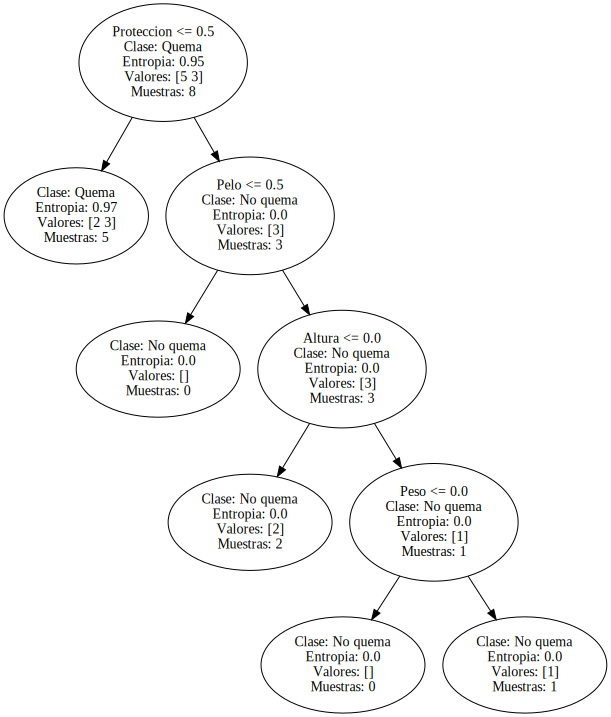

In [11]:
g = Digraph('grafo')
conecciones = {}
cont = 0
for lab in labels[0:4]:
    #print(quemadura_data)
    print('***********{}************'.format(lab))
    info_A = calcular_ganancia(valores, lab)
    ganancia = round(entropia - info_A, 2)
    if cont == 0:
        valores, cuantos = np.unique(quemadura_data['Quemadura'], return_counts=True)
        print('Valores: {} Cuantos: {}'.format(valores, cuantos))
        mean = sum(valores)/2
    else:
        mean = sum(valoresCumple)/2
        print('Valores: {} Cuantos: {}'.format(valoresCumple, cuantosCumple))
        mean = sum(valoresCumple)/2
    print('media', mean)
    sn = splitNode(lab, mean)
    act = cont
    #print('act', act)
    if entropia == 0:
        cla = clase[1]
    else:
        cla = clase[0]
    g.node("{}".format(cont), label='{} <= {}\\n Clase: {} \\n Entropia: {} \\n Valores: {} \\n Muestras: {}'.format(
            lab, mean, cla, round(entropia, 2), cuantos, sum(cuantos)
            ))
    for key, value in sn.items():
        valores, cuantos = np.unique(quemadura_data['Quemadura'].iloc[value[0]], return_counts=True)
        #print('INDICES: {} \\n {}'.format(value, quemadura_data['Quemadura'][quemadura_data.index[tuple(value)]]))
        #print('Valores dentro: {} Cuantos dentro: {}'.format(valores, cuantos))
        entropia = abs(round(calcular_entropia(cuantos/sum(cuantos)), 2))
        if entropia == 0:
            cla = clase[1]
        else:
            cla = clase[0]

        padre = act
        #print('{} {} entropia {}   contador {} act{}'.format(str(value[0]), key, abs(entropia), cont, act))

        cont+=1
        dataw = np.array(np.where(quemadura_data[lab] > mean)[0])
        print(quemadura_data)
        if key == 'cumple':
            valoresCumple, cuantosCumple = valores, cuantos
            conecciones[str(padre)] = str(cont)
            g.node("{}".format(cont), label='Clase: {} \\n Entropia: {} \\n Valores: {} \\n Muestras: {}'.format(
                cla, round(entropia, 2), cuantos, sum(cuantos)
            ))
        cont+=1
        if key == 'nocumple':
            quemadura_data = quemadura_data.iloc[value[0]]
            val_append(conecciones, str(padre), str(cont))
            g.node("{}".format(cont), label='Clase: {} \\n Entropia: {} \\n Valores: {} \\n Muestras: {}'.format(
                cla, round(entropia, 2), cuantos, sum(cuantos)
            ))
print(conecciones)
cn = 0
for key, value in conecciones.items():
    for val in value:
        g.edge(str(key), str(val))
g